In [0]:
from IPython.display import display
from PIL import Image

[IPython Display Official Docs](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.Image)

[PIL Official Docs](https://pillow.readthedocs.io/en/4.0.x/reference/Image.html)


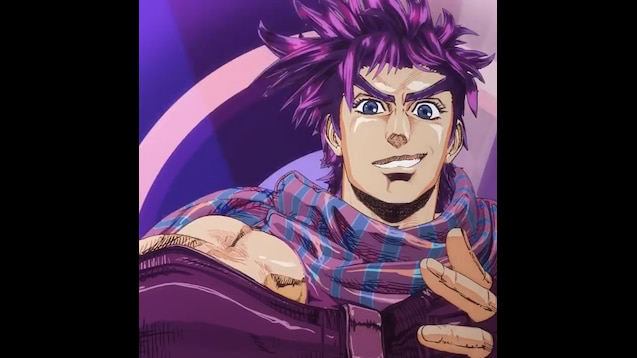

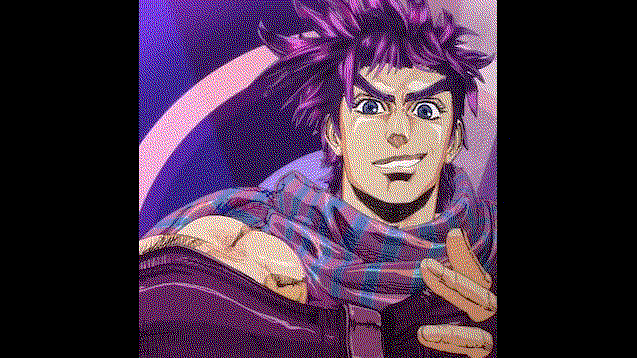

In [0]:
def getNearestColor(rgb):
  factor = 2
  out_rgb = []
  for primary in rgb:
    out_rgb.append(round(primary * factor / 255) * int(255 / factor))
  return tuple(out_rgb)

def getError(rgb, new_rgb):
  out_rgb = []
  for i, primary in enumerate(rgb):
    out_rgb.append(rgb[i] - new_rgb[i])
  return tuple(out_rgb)

with Image.open("josephjoestar.jpg") as img:
  display(img)

  stipple_copy = img.copy()
  w,h = stipple_copy.size
  for y in range(h):
    for x in range(w):
      pixel = stipple_copy.getpixel((x,y))
      new_pixel = getNearestColor(pixel)
      err_pixel = getError(pixel, new_pixel)
      stipple_copy.putpixel((x,y), new_pixel)

      floyd_steinberg_values = [
        ( 1, 0, 7/16),
        (-1, 1, 3/16),
        ( 0, 1, 5/16),
        ( 1, 1, 1/16)
      ]
      for val in floyd_steinberg_values:
        off_x,off_y,ratio = val
        if (x+off_x < w and y+off_y < h):
          temp_pixel = list(stipple_copy.getpixel((x+off_x, y+off_y)))
          for i, color in enumerate(temp_pixel):
            temp_pixel[i] = round(color + err_pixel[i] * ratio)
          temp_pixel = tuple(temp_pixel)
          stipple_copy.putpixel((x+off_x, y+off_y), temp_pixel)

  display(stipple_copy)
      
        